# **Data Visualitation Methodologi & Define Purpose and parameters**

Dalam proses pengembangan visualisasi data, langkah pertama adalah menentukan data yang akan digunakan. Data yang dipilih dalam konteks ini mencakup kasus Demam Berdarah Dengue (DBD) di Bandar Lampung serta variabel cuaca yang meliputi suhu rata-rata (Tavg), kelembaban relatif rata-rata (RH_avg), dan curah hujan (RR), yang semuanya dianalisis berdasarkan bulan Januari - Desember. Dengan memfokuskan pada data ini, visualisasi bertujuan untuk menggambarkan hubungan antara kondisi cuaca dan jumlah kasus DBD, sehingga pengguna dapat memahami pola yang muncul sepanjang tahun.

Tujuan utama dari visualisasi ini adalah untuk mengidentifikasi tren yang menunjukkan bagaimana variabilitas cuaca dapat mempengaruhi penyebaran kasus DBD. Pengguna/user dari visualisasi ini meliputi peneliti, akademisi, dan pengambil keputusan di bidang kesehatan masyarakat, yang dapat memanfaatkan informasi ini untuk merumuskan strategi pencegahan yang lebih efektif. Fungsi dari visualisasi ini adalah untuk menyajikan data dengan cara yang jelas dan informatif, sehingga memudahkan analisis dan diskusi lebih lanjut mengenai interaksi antara faktor cuaca dan kesehatan masyarakat. Tone yang digunakan dalam visualisasi ini bersifat serius dan informatif, yang menunjukkan  pentingnya isu kesehatan yang sedang ditangani, sekaligus memastikan bahwa informasi yang disampaikan dapat diakses dan dipahami oleh berbagai kalangan pengguna, termasuk mereka yang tidak memiliki latar belakang teknis.

In [121]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [117]:
# Impor data kasus DBD
df_dbd = pd.read_csv('/content/Kasus DBD Perbulan 2023.csv')

print("Kolom DataFrame Kasus DBD:")
print(df_dbd.columns)

print("\nInformasi DataFrame Kasus DBD:")
print(df_dbd.info())

print("\nBentuk DataFrame Kasus DBD:")
print(df_dbd.shape)

print("\n5 Baris Pertama DataFrame Kasus DBD:")
print(df_dbd.head())

# Impor data cuaca
df_cuaca = pd.read_csv('/content/CUACA BMKG 2021-2023 (1).csv')

# Print kolom, info, shape, dan 5 baris pertama data cuaca
print("Kolom DataFrame Cuaca:")
print(df_cuaca.columns)

print("\nInformasi DataFrame Cuaca:")
print(df_cuaca.info())

print("\nBentuk DataFrame Cuaca:")
print(df_cuaca.shape)

print("\n5 Baris Pertama DataFrame Cuaca:")
print(df_cuaca.head())


Kolom DataFrame Kasus DBD:
Index(['Bulan', 'Kasus'], dtype='object')

Informasi DataFrame Kasus DBD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bulan   12 non-null     object
 1   Kasus   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes
None

Bentuk DataFrame Kasus DBD:
(12, 2)

5 Baris Pertama DataFrame Kasus DBD:
      Bulan  Kasus
0   Januari     25
1  Februari     23
2     Maret     13
3     April     12
4       Mei     27
Kolom DataFrame Cuaca:
Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR'], dtype='object')

Informasi DataFrame Cuaca:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  365 non-null    object 
 1   Tn       365 non-null    float64
 2   Tx       365 non-null

In [118]:
# Cek missing values di data kasus DBD
print("\nMissing values di DataFrame Kasus DBD:")
print(df_dbd.isnull().sum())

# Cek missing values di data cuaca
print("\nMissing values di DataFrame Cuaca:")
print(df_cuaca.isnull().sum())



Missing values di DataFrame Kasus DBD:
Bulan    0
Kasus    0
dtype: int64

Missing values di DataFrame Cuaca:
Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
dtype: int64


In [96]:
# Konversi kolom tanggal pada data cuaca
df_cuaca['Tanggal'] = pd.to_datetime(df_cuaca['Tanggal'], format='%d/%m/%Y')

# Menambahkan kolom bulan pada data cuaca
df_cuaca['Month'] = df_cuaca['Tanggal'].dt.month


In [97]:
# Menghitung rata-rata data cuaca per bulan
monthly_cuaca = df_cuaca.groupby('Month').mean().reset_index()

print(monthly_cuaca.head())


   Month             Tanggal         Tn         Tx       Tavg     RH_avg  \
0      1 2023-01-16 00:00:00  25.251613  31.906452  27.925806  79.290323   
1      2 2023-02-14 12:00:00  25.042857  31.700000  27.735714  80.250000   
2      3 2023-03-16 00:00:00  25.135484  32.458065  27.951613  80.935484   
3      4 2023-04-15 12:00:00  26.133333  33.133333  28.913333  80.900000   
4      5 2023-05-16 00:00:00  26.406452  33.112903  29.303226  80.645161   

         RR  
0  4.235484  
1  7.235714  
2  6.338710  
3  1.893333  
4  7.954839  


In [98]:
# Menghitung rata-rata data cuaca per bulan dan total curah hujan
monthly_cuaca = df_cuaca.groupby('Month').agg({
    'Tavg': 'mean',
    'RH_avg': 'mean',
    'RR': 'sum'  # Menghitung total curah hujan
}).reset_index()

print(monthly_cuaca)

    Month       Tavg     RH_avg     RR
0       1  27.925806  79.290323  131.3
1       2  27.735714  80.250000  202.6
2       3  27.951613  80.935484  196.5
3       4  28.913333  80.900000   56.8
4       5  29.303226  80.645161  246.6
5       6  28.393333  83.100000  100.3
6       7  28.441935  79.935484   58.0
7       8  28.358065  81.935484    9.5
8       9  28.633333  78.600000    4.2
9      10  29.725806  76.354839    0.2
10     11  29.106667  82.233333   80.9
11     12  28.990323  79.612903  153.0


In [99]:
# Dictionary untuk mapping nama bulan ke numerik
month_map = {
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4,
    'Mei': 5, 'Juni': 6, 'Juli': 7, 'Agustus': 8,
    'September': 9, 'Oktober': 10, 'November': 11, 'Desember': 12
}

# Mapping nilai kolom 'Bulan' di df_dbd
df_dbd['Month'] = df_dbd['Bulan'].map(month_map)

# Menggabungkan data kasus DBD dengan data cuaca bulanan berdasarkan kolom 'Month'
df_merged = pd.merge(df_dbd, monthly_cuaca, on='Month')

print(df_merged.head())


      Bulan  Kasus  Month       Tavg     RH_avg     RR
0   Januari     25      1  27.925806  79.290323  131.3
1  Februari     23      2  27.735714  80.250000  202.6
2     Maret     13      3  27.951613  80.935484  196.5
3     April     12      4  28.913333  80.900000   56.8
4       Mei     27      5  29.303226  80.645161  246.6


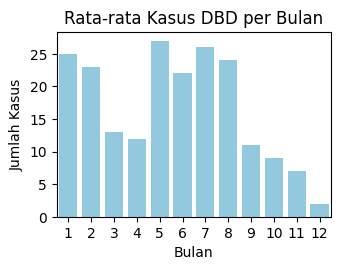

In [100]:
# Kasus DBD
plt.subplot(2, 2, 4)
sns.barplot(x='Month', y='Kasus', data=average_data, color='skyblue')
plt.title('Rata-rata Kasus DBD per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')

plt.tight_layout()
plt.show()

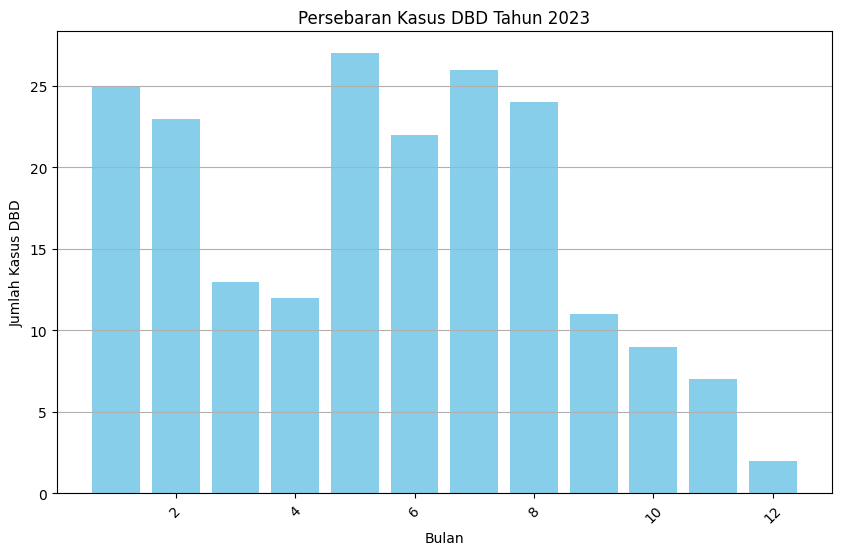

In [101]:
# Plotting persebaran kasus DBD per bulan
plt.figure(figsize=(10, 6))
plt.bar(df_dbd['Month'], df_dbd['Kasus'], color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Persebaran Kasus DBD Tahun 2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [102]:
# Mengelompokkan dan menghitung rata-rata per bulan
df_merged_avg = df_merged.groupby('Month').mean(numeric_only=True).reset_index()

# Menampilkan rata-rata kasus DBD dan variabel cuaca per bulan
print("Rata-rata Data Cuaca per Bulan:")
print(df_merged_avg[['Month', 'Tavg', 'RH_avg', 'RR', 'Kasus']].to_string(index=False))

Rata-rata Data Cuaca per Bulan:
 Month      Tavg    RH_avg    RR  Kasus
     1 27.925806 79.290323 131.3   25.0
     2 27.735714 80.250000 202.6   23.0
     3 27.951613 80.935484 196.5   13.0
     4 28.913333 80.900000  56.8   12.0
     5 29.303226 80.645161 246.6   27.0
     6 28.393333 83.100000 100.3   22.0
     7 28.441935 79.935484  58.0   26.0
     8 28.358065 81.935484   9.5   24.0
     9 28.633333 78.600000   4.2   11.0
    10 29.725806 76.354839   0.2    9.0
    11 29.106667 82.233333  80.9    7.0
    12 28.990323 79.612903 153.0    2.0


In [103]:
# Menghitung rata-rata dan total kasus DBD dan cuaca per bulan
average_data = df_merged.groupby('Month').agg({
    'Kasus': 'mean',     # Rata-rata kasus DBD
    'Tavg': 'mean',           # Rata-rata Tavg
    'RH_avg': 'mean',         # Rata-rata RH_avg
    'RR': 'sum'               # Total RR
}).reset_index()

# Menampilkan hasil perhitungan
print("Rata-rata dan Total Kasus DBD serta Variabel Cuaca per Bulan:")
print(average_data)


Rata-rata dan Total Kasus DBD serta Variabel Cuaca per Bulan:
    Month  Kasus       Tavg     RH_avg     RR
0       1   25.0  27.925806  79.290323  131.3
1       2   23.0  27.735714  80.250000  202.6
2       3   13.0  27.951613  80.935484  196.5
3       4   12.0  28.913333  80.900000   56.8
4       5   27.0  29.303226  80.645161  246.6
5       6   22.0  28.393333  83.100000  100.3
6       7   26.0  28.441935  79.935484   58.0
7       8   24.0  28.358065  81.935484    9.5
8       9   11.0  28.633333  78.600000    4.2
9      10    9.0  29.725806  76.354839    0.2
10     11    7.0  29.106667  82.233333   80.9
11     12    2.0  28.990323  79.612903  153.0


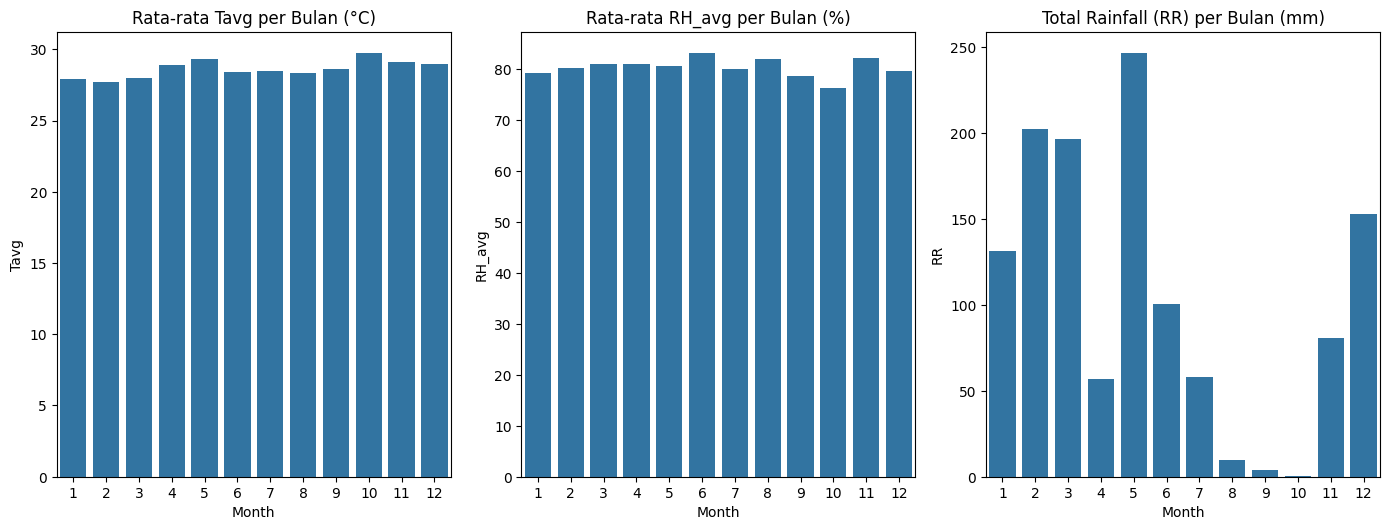

In [104]:
# Rata-rata dan total kasus DBD dan cuaca per bulan
average_data = df_merged.groupby('Month').mean(numeric_only=True).reset_index()

# Visualisasi rata-rata kasus DBD terhadap variabel cuaca
plt.figure(figsize=(14, 10))

# Tavg (Average Temperature)
plt.subplot(2, 3, 1)
sns.barplot(x='Month', y='Tavg', data=average_data)
plt.title('Rata-rata Tavg per Bulan (°C)')

# RH_avg (Average Relative Humidity)
plt.subplot(2, 3, 2)
sns.barplot(x='Month', y='RH_avg', data=average_data)
plt.title('Rata-rata RH_avg per Bulan (%)')

# RR (Rainfall)
plt.subplot(2, 3, 3)
sns.barplot(x='Month', y='RR', data=average_data)
plt.title('Total Rainfall (RR) per Bulan (mm)')

plt.tight_layout()
plt.show()

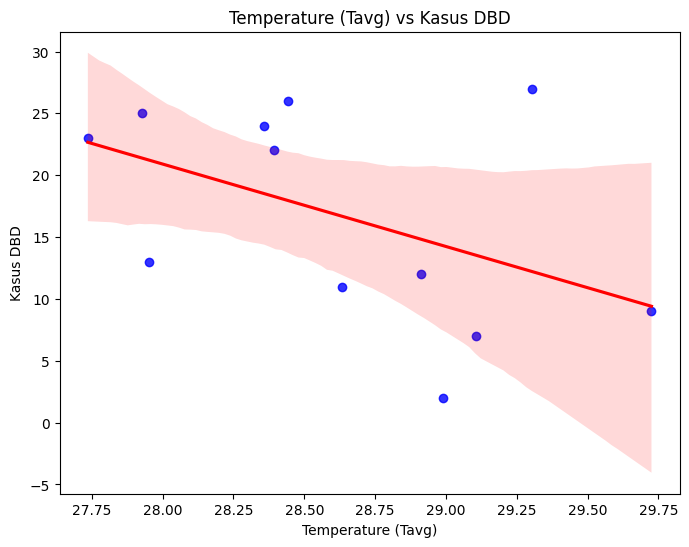

In [105]:
# Tavg vs Kasus DBD
plt.figure(figsize=(8, 6))
sns.regplot(x='Tavg', y='Kasus', data=df_merged, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Temperature (Tavg) vs Kasus DBD')
plt.xlabel('Temperature (Tavg)')
plt.ylabel('Kasus DBD')
plt.show()


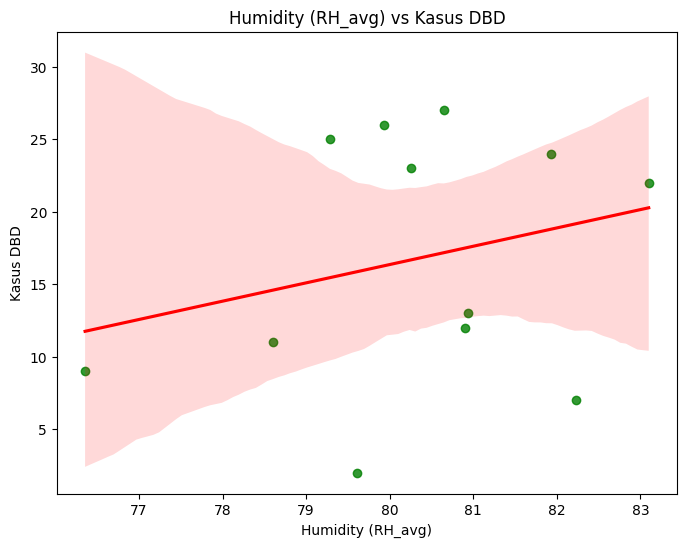

In [106]:
# Visualisasi RH_avg vs Kasus DBD
plt.figure(figsize=(8, 6))
sns.regplot(x='RH_avg', y='Kasus', data=df_merged, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Humidity (RH_avg) vs Kasus DBD')
plt.xlabel('Humidity (RH_avg)')
plt.ylabel('Kasus DBD')
plt.show()


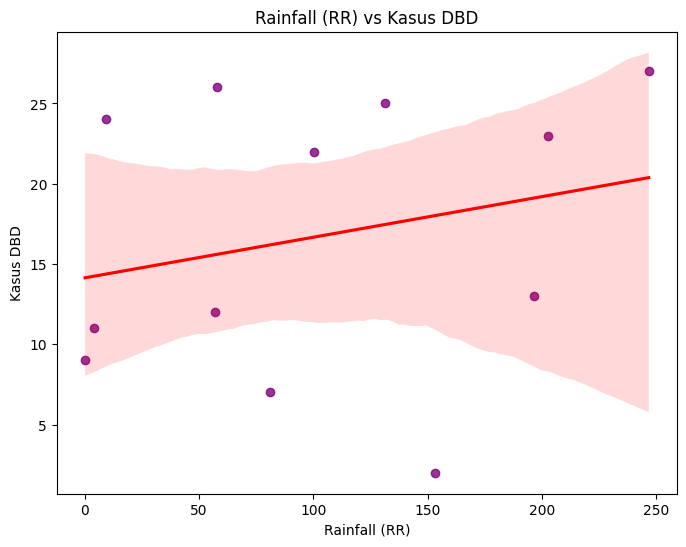

In [107]:
# Visualisasi RR vs Kasus DBD
plt.figure(figsize=(8, 6))
sns.regplot(x='RR', y='Kasus', data=df_merged, scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title('Rainfall (RR) vs Kasus DBD')
plt.xlabel('Rainfall (RR)')
plt.ylabel('Kasus DBD')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

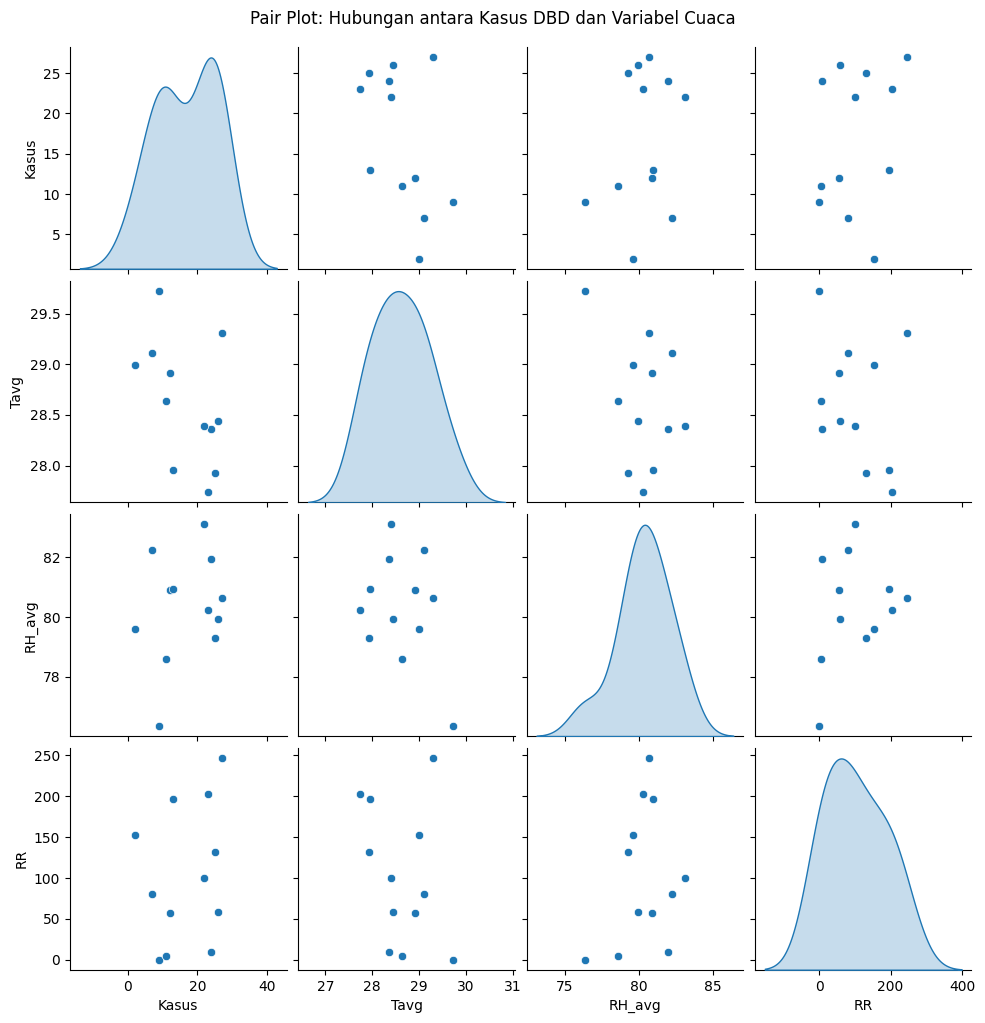

In [108]:
# Pair Plot untuk semua variabel
sns.pairplot(df_avg[['Kasus', 'Tavg', 'RH_avg', 'RR']], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot: Hubungan antara Kasus DBD dan Variabel Cuaca', y=1.02)
plt.show()


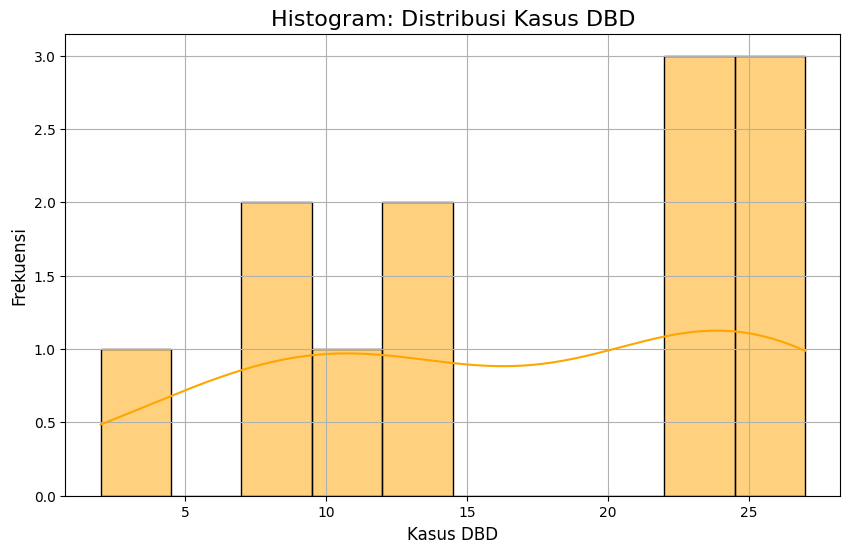

In [109]:
# Histogram untuk distribusi Kasus DBD
plt.figure(figsize=(10, 6))
sns.histplot(df_avg['Kasus'], bins=10, kde=True, color='orange')
plt.title('Histogram: Distribusi Kasus DBD', fontsize=16)
plt.xlabel('Kasus DBD', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid()
plt.show()


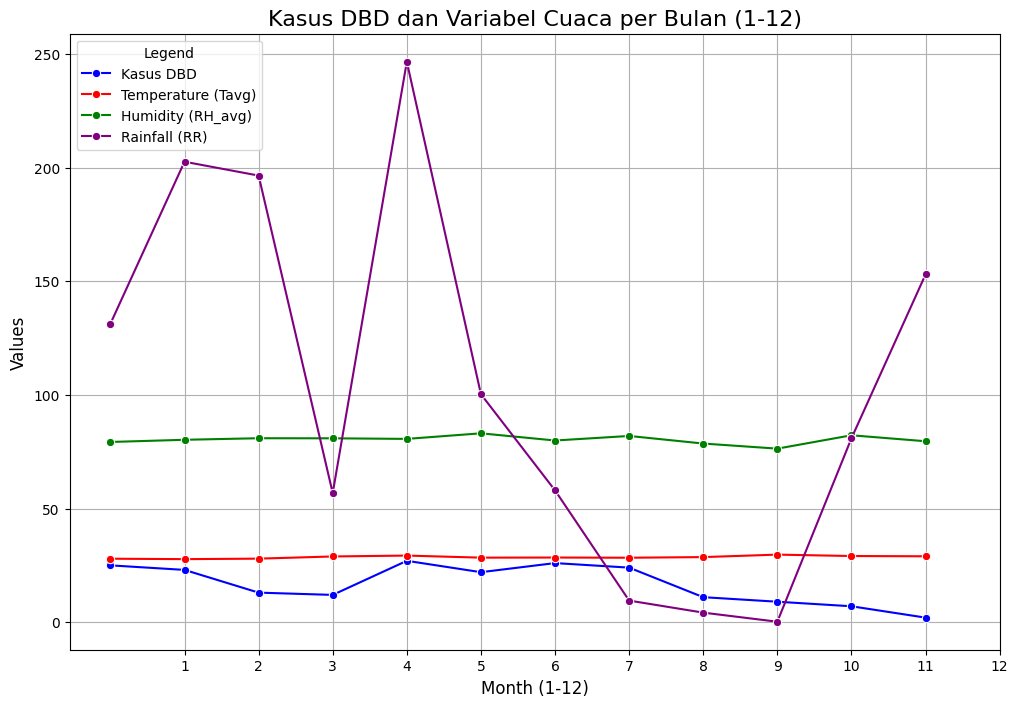

In [110]:
# Membuat figure dan axis untuk plot
plt.figure(figsize=(12, 8))

# Plot Kasus DBD
sns.lineplot(x='Bulan', y='Kasus', data=df_merged, marker='o', label='Kasus DBD', color='blue')

# Plot Tavg (Suhu rata-rata)
sns.lineplot(x='Bulan', y='Tavg', data=df_merged, marker='o', label='Temperature (Tavg)', color='red')

# Plot RH_avg (Kelembaban rata-rata)
sns.lineplot(x='Bulan', y='RH_avg', data=df_merged, marker='o', label='Humidity (RH_avg)', color='green')

# Plot RR (Curah hujan)
sns.lineplot(x='Bulan', y='RR', data=df_merged, marker='o', label='Rainfall (RR)', color='purple')

# Menambahkan judul dan label
plt.title('Kasus DBD dan Variabel Cuaca per Bulan (1-12)', fontsize=16)
plt.xlabel('Month (1-12)', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Menambahkan legenda
plt.legend(title='Legend', loc='upper left')

# Menampilkan plot
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Menampilkan bulan 1-12 di sumbu x
plt.grid(True)
plt.show()


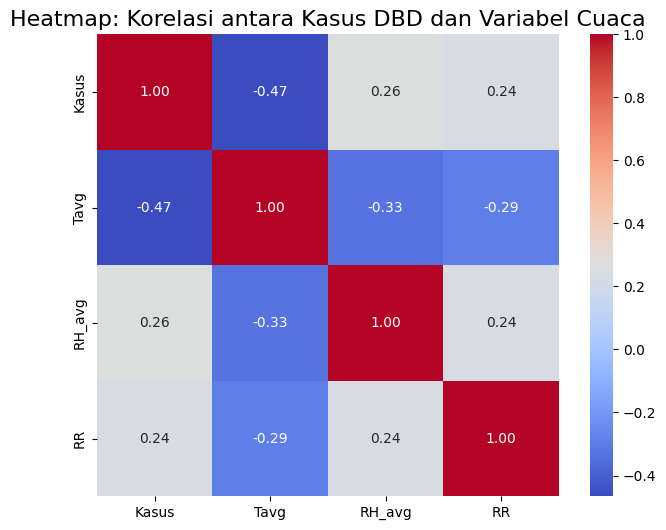

In [111]:
# Menghitung korelasi
correlation_matrix = df_avg[['Kasus', 'Tavg', 'RH_avg', 'RR']].corr()

# Membuat Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Menambahkan judul
plt.title('Heatmap: Korelasi antara Kasus DBD dan Variabel Cuaca', fontsize=16)
plt.show()
